In [1]:
# !pip install adjustText

In [2]:
from adjustText import adjust_text
from matplotlib.ticker import FuncFormatter

In [3]:
# Importing libraries
import pandas as pd
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
import ast

# loading data
data = load_dataset("lukebarousse/data_jobs")
df = data["train"].to_pandas()

# cleaning data
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df["job_skills"] = df["job_skills"].apply(func=(lambda skills: ast.literal_eval(skills) if pd.notna(skills) else skills))

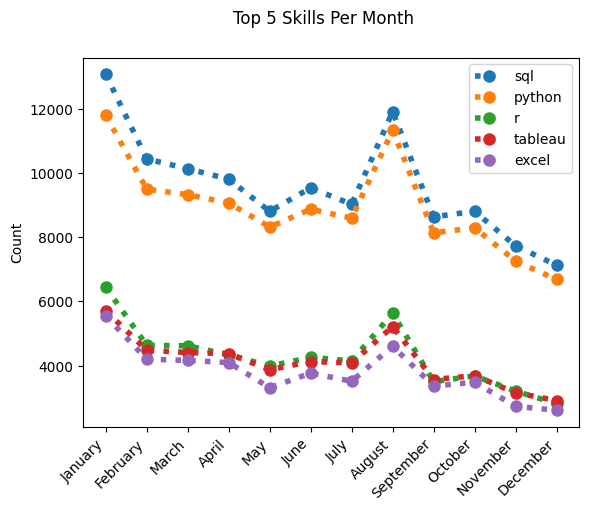

In [4]:
df_us = df[df["job_country"] == "United States"].copy()

df_us["job_posted_month"] = df_us["job_posted_date"].dt.month

df_us_exploded = df_us.explode(column="job_skills")

df_skill_month_pv = df_us_exploded.pivot_table(index="job_posted_month", columns="job_skills", aggfunc="size", fill_value=0)

df_skill_month_pv = df_skill_month_pv.T

df_skill_month_pv["Total"] = df_skill_month_pv.sum(axis=1)

df_skill_month_pv = df_skill_month_pv.sort_values(by="Total",ascending=False)

df_skill_month_pv = df_skill_month_pv.drop(columns=["Total"]).T

df_skill_month_pv.index = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

top_5_skills = df_skill_month_pv.iloc[:,:5]

fig, ax = plt.subplots()
# top_5_skills.plot(ax=ax, kind="line")
for skill in top_5_skills.columns:
    ax.plot(top_5_skills.index, top_5_skills[skill], label=skill, lw=4, marker="o", ls=":", markersize=8)
ax.legend()
ax.set_ylabel("Count")
fig.suptitle("Top 5 Skills Per Month")
plt.set_cmap("viridis")
plt.xticks(rotation=45, ha="right")
plt.show()

In [5]:
df_us_gb = df_us_exploded.groupby("job_skills").agg(
    skill_count = ("job_skills", "count"),
    median_salary = ("salary_year_avg", "median")
).sort_values(by="skill_count", ascending=False)

In [6]:
# top_skills = 10
# fig, ax = plt.subplots()
# texts = []
# ax.scatter(df_us_gb.head(top_skills)["skill_count"], df_us_gb.head(top_skills)["median_salary"])
# for i, skill in enumerate(df_us_gb.head(top_skills).index):
#     texts.append(plt.text(df_us_gb.head(top_skills)["skill_count"].iloc[i], df_us_gb.head(top_skills)["median_salary"].iloc[i], skill))
#     adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))
# # df_us_gb.head(top_skills).plot(kind="scatter", x="skill_count", y="median_salary")

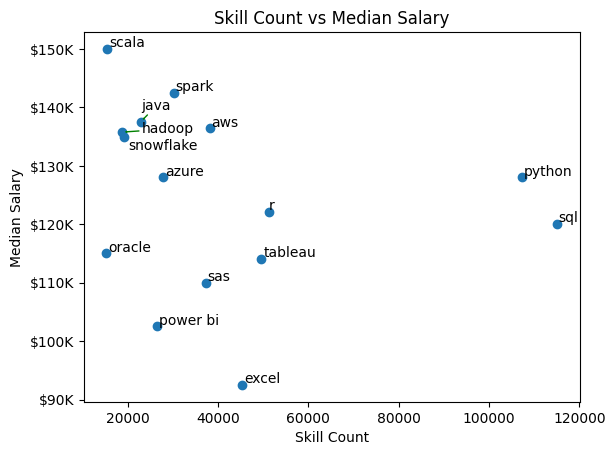

In [7]:
top_skills = 15
fig, ax = plt.subplots()
texts = []

# Store the top skills in a variable
top_skills_data = df_us_gb.head(top_skills)

# Scatter plot
ax.scatter(top_skills_data["skill_count"], top_skills_data["median_salary"])

# Adding labels to each point
for i, skill in enumerate(top_skills_data.index):
    texts.append(plt.text(top_skills_data["skill_count"].iloc[i], 
                           top_skills_data["median_salary"].iloc[i], 
                           skill))

# Adjust text to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='green'))

# Set titles and labels
ax.yaxis.set_major_formatter(FuncFormatter(lambda x,pos:f"${(x/1000):,.0f}K"))
ax.set_title('Skill Count vs Median Salary')
ax.set_xlabel('Skill Count')
ax.set_ylabel('Median Salary')

# Show the plot
plt.show()

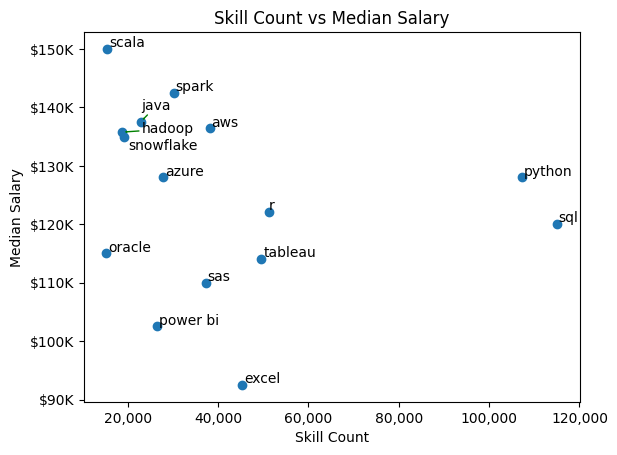

In [8]:
top_skills = 15
fig, ax = plt.subplots()
texts = []

# Store the top skills in a variable
top_skills_data = df_us_gb.head(top_skills)

# Scatter plot
ax.scatter(top_skills_data["skill_count"], top_skills_data["median_salary"])

# Adding labels to each point
for i, skill in enumerate(top_skills_data.index):
    texts.append(plt.text(top_skills_data["skill_count"].iloc[i], 
                           top_skills_data["median_salary"].iloc[i], 
                           skill))

# Adjust text to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='green'))

# Set titles and labels
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f"${int(x/1000):,.0f}K"))  # Format y-axis with commas and dollar sign
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f"{x:,.0f}"))  # Format x-axis with commas

ax.set_title('Skill Count vs Median Salary')
ax.set_xlabel('Skill Count')
ax.set_ylabel('Median Salary')

# Show the plot
plt.show()

# Bar Chart

In [11]:
df["salary_year_avg"]

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
785736   NaN
785737   NaN
785738   NaN
785739   NaN
785740   NaN
Name: salary_year_avg, Length: 785741, dtype: float64